# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the      test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the        others. Look at the correlations between scores.
6. Summarize your findings.

In [21]:
# Importing the pandas module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. What are the average reading scores for students with/without the test preparation course?

In [22]:
avg_reading_scores = df.groupby('test_prep_course')[['reading']].mean()
avg_reading_scores

,reading
test_prep_course,
completed,73.893855
none,66.534268


The average scores shows that students that took the preparation course performed better in reading than students that did not take the preparation course.

2. What are the average scores for the different parental education levels?


In [23]:
Par_educ_level = df.groupby('parent_education_level')['reading','writing','math']. mean()
Par_educ_level


,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


From the average scores for the different parental level of education, we can see that students whose parents have a master's degree performed better in all three subjects (reading, writing and math) than the students whose parents have other degrees.

3. Create plots to visualize findings for questions 1 and 2.


Text(0.5, 0, 'Test Preparation Course')

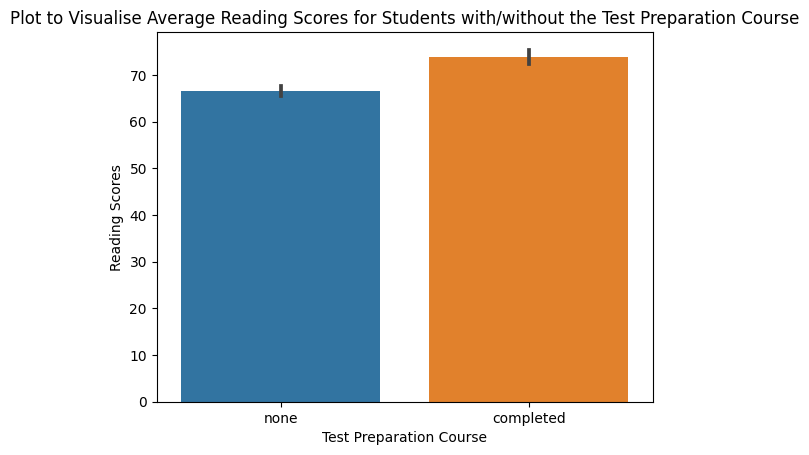

In [35]:
sns.barplot(x ='test_prep_course', y = 'reading', data =df).set(title = 'Plot to Visualise Average Reading Scores for Students with/without the Test Preparation Course')
plt.ylabel('Reading Scores')
plt.xlabel('Test Preparation Course')





Text(0.5, 1.0, 'Plot to Visualise Average Scores for the different Parental Education Levels')

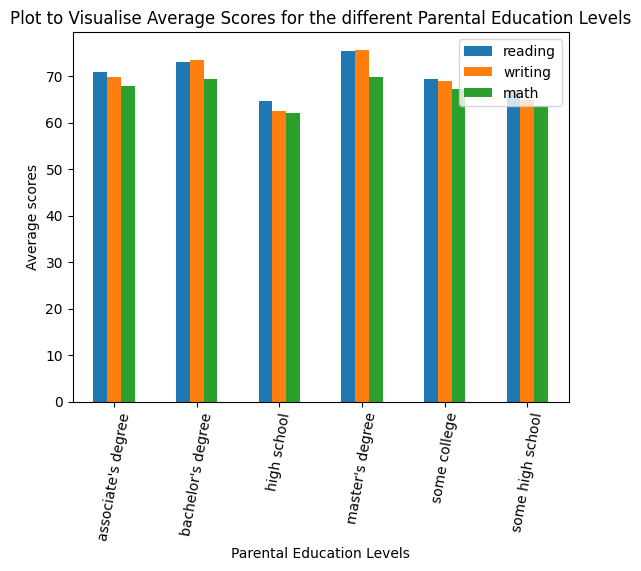

In [41]:
Par_educ_level.plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.ylabel('Average scores')
plt.xlabel('Parental Education Levels')
plt.title('Plot to Visualise Average Scores for the different Parental Education Levels')

On average, students whose parents have master's degree did better than the students in all subjects(reading, writing and math).

4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

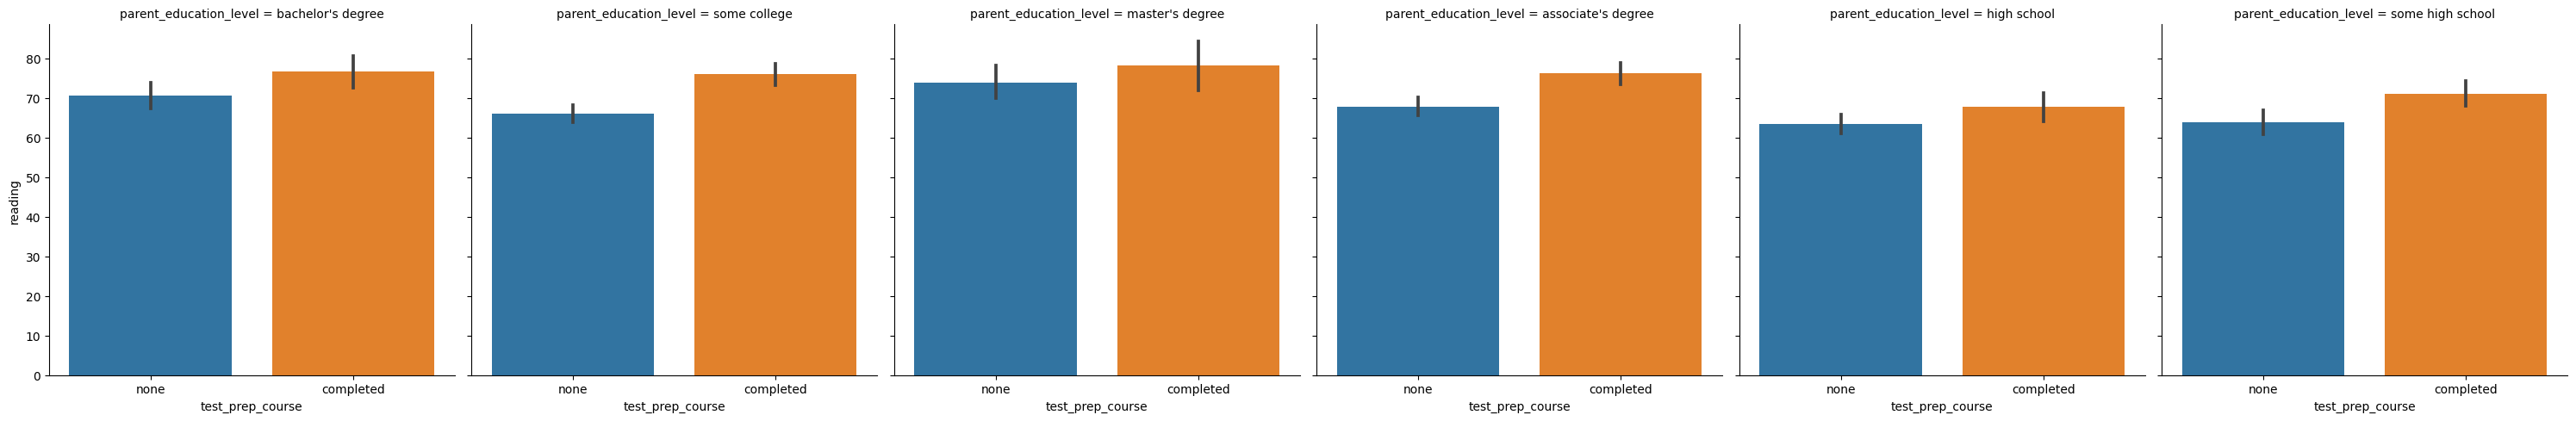

In [43]:
sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=df, kind='bar');


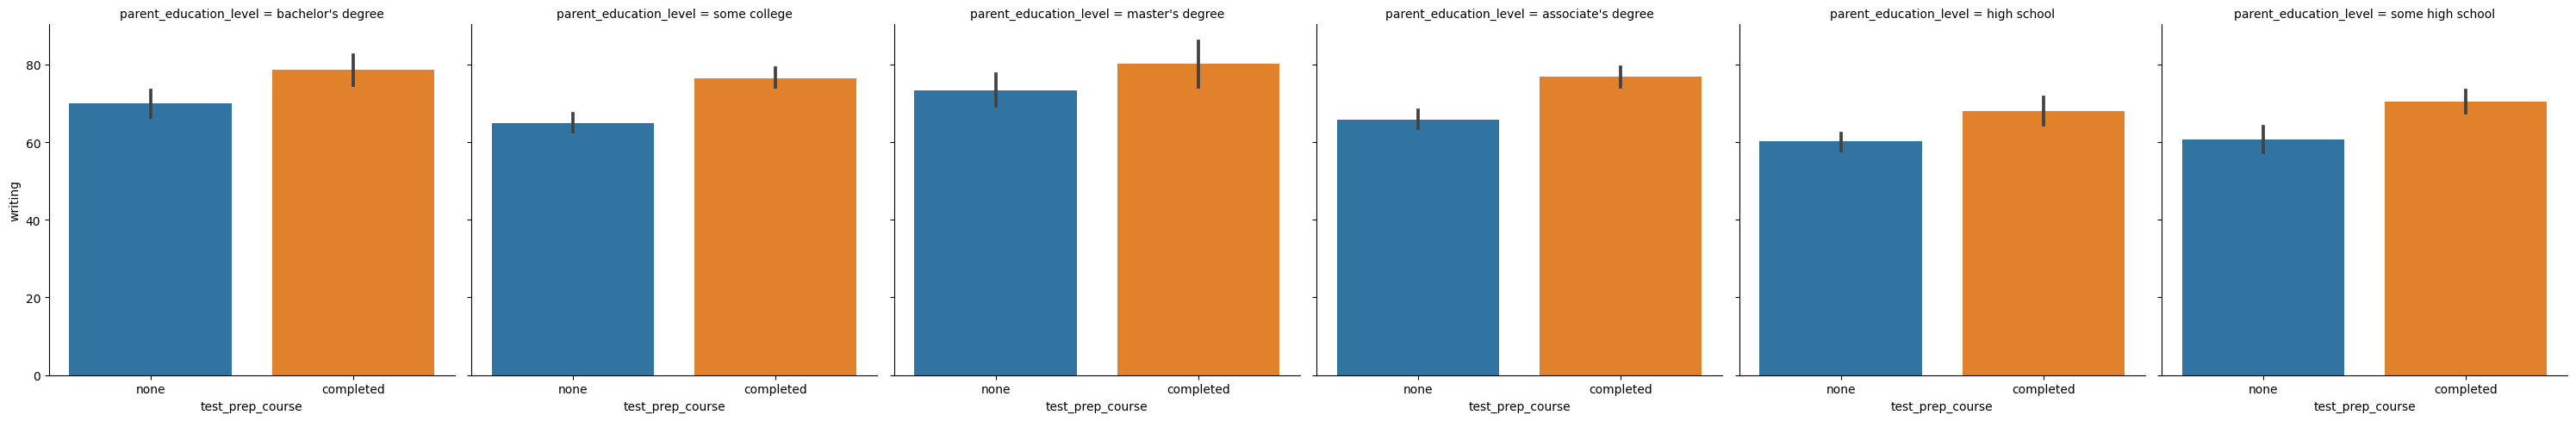

In [44]:
sns.catplot(x='test_prep_course', y='writing', col='parent_education_level', data=df, kind='bar');

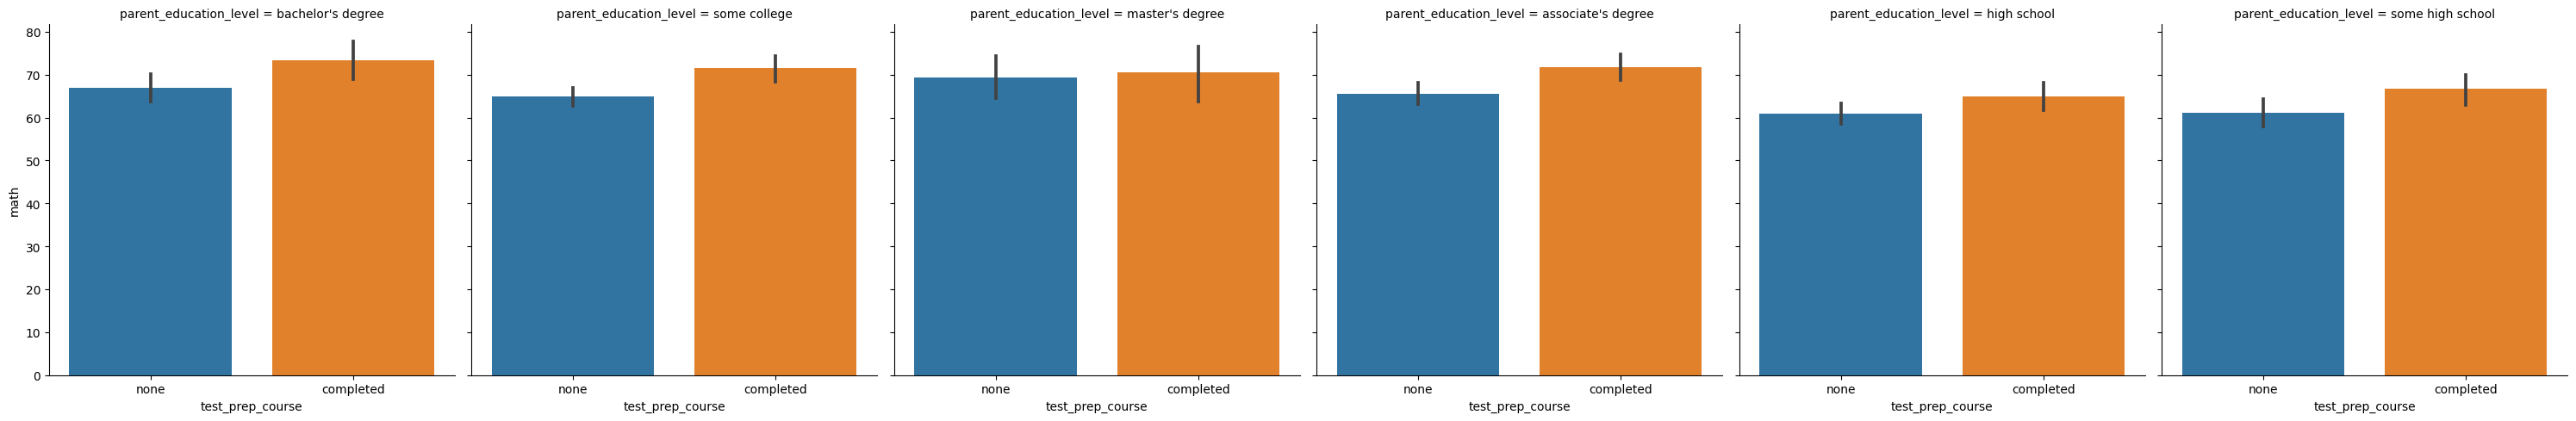

In [45]:
sns.catplot(x='test_prep_course', y='math', col='parent_education_level', data=df, kind='bar');


On average, all the students taking the prep course outperform those who didn't, but those with parents on a master's degree level outperform all the rest.

Also, students whose parents have bachelors degree, some college and associate degree and took the test preparation course performed better than students whose parents have master's degree but did not take the test preparation course.



5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [31]:
correlation = df.corr()
correlation

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'correlation heatmap of the different scores')

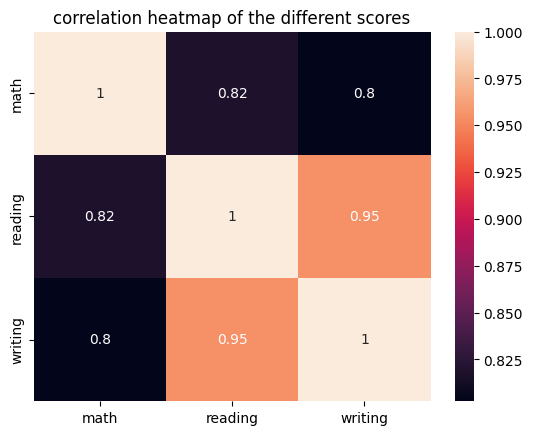

In [46]:
sns.heatmap(correlation,annot = True)
plt.title('correlation heatmap of the different scores')


There is a strong correlation, therefore students who scored well on one subject also scored well in other subjects.

6. Summarise your findings.

In summary, to answer the principal's questions:
1. The test preparation courses are very helpful because as shown in the sub- group plot (question 4), students whose parents have lesser qualification in master's degree did better when they took the test preparation course than the students whose parents have a master's degree but did not take the test preparation course.
2. From exploring the effect of parental education level on test scores, we can see that the parental education level have an effect on students' performance in all the subjects (refer to the 'Plot to Visualise Average Scores for the different Parental Education Levels' in question 3).